## 선형판별분석 (LDA, Linear Discriminant Analysis)

- PCA와 유사하게 입력 데이터 세트를 저차원 공간으로 투영(project)해 차원을 축소하는 기법

- PCA와 다르게 LDA는 지도학습의 분류(Classification)에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소

- LDA는 특정 공간상에서 클래스 분리를 최대화하는 축을 찾기 위해 클래스 간 분산(between-class scatter)과 클래스 내부 분산(within-class scatter)의 비율을 최대화하는 방식으로 차원을 축소

<center>
 <img src="https://blog.kakaocdn.net/dn/KOqHC/btqGebaAiIc/CKAMR23KhIcmh6UK198bd1/img.png" alt="클래스 간 분산과 내부 분산" width="40%" />

</center>

- LDA는 투영을 통해 가능한 한 클래스를 멀리 떨어지게 하므로 SVM 같은 다른 분류 알고리즘을 적용하기 전에 차원을 축소시키는 데 사용

#### LDA 실습 01

붓꽃 데이터 세트에 LDA 적용

In [1]:
# 특성의 분산이 1이 되도록 데이터의 스케일을 조정
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# 데이터로드
iris = load_iris()

# 스케일 조정
X_scaled = StandardScaler().fit_transform(iris.data)

- LDA는 PCA와 다르게 비지도학습이 아닌 지도학습
- 클래스의 Target 값이 변환 시에 필요

In [2]:
# LDA 모델 학습
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X_scaled, iris.target)
iris_lda = lda.transform(X_scaled)
iris_lda.shape

(150, 2)

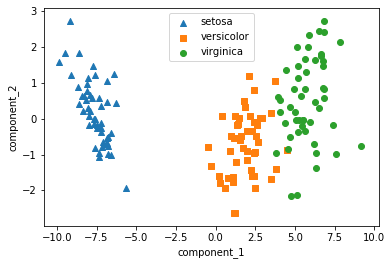

In [3]:
# LDA 변환된 데이터를 시각화
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# DataFrame 변경
df = pd.DataFrame(iris_lda , columns=['component_1', 'component_2'])
df['target']=iris.target

#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

# setosa의 target 값은 0, versicolor는 1, virginica는 2.
# 각 target 별 산점도 
for i, marker in enumerate(markers):
    x_axis_data = df[df['target']==i]['component_1']
    y_axis_data = df[df['target']==i]['component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('component_1')
plt.ylabel('component_2')
plt.show()

## 특이값분해 (SVD, Singular Value Decomposition)

- PCA의 경우 정방행렬(행과 열의 크기가 같은 행렬)만을 고유벡터로 분해할 수 있으나 SVD는 정방행렬뿐만 아니라 행과 열의 크기가 다른 행렬에 대해서도 적용 가능

- SVD는 m x n 크기의 행렬 A를 분해

 <center>
 <img src="https://www.pikpng.com/pngl/b/563-5634372_where-a-is-the-input-data-matrix-u.png" alt="특이값분해" width="60%" />

 출처: https://www.pikpng.com/transpng/hxRRmbR/

 </center>

 - 행렬 U와 V에 속한 벡터는 특이 벡터(Singular Vector)이며, 모든 특이 벡터는 서로 직교하는 성질을 갖음
 - ∑는 직사각 대각 행렬이며, 행렬의 대각에 위치한 값만 0이 아니고 나머지 위치의 값은 모두 0
 - m < n인 경우 첫번째와 같이 분해되며, m > n인 경우 두번째와 같이 분해
 - ∑의 0이 아닌 대각 원소값을 특이값(Singular Value)라고 함
 

- Truncated SVD는 ∑의 대각원소 중에 상위 몇 개만 추출해서 여기에 대응하는 U와 V의 원소도 함께 제거해 더욱 차원을 줄인 형태로 분해하는 것
 - 데이터 정보가 압축되어 분해되므로 원본 행렬을 정확하게 복원할 수는 없으나 상당 수준의 근사값으로 복원이 가능

#### SVD 실습 01

붓꽃 데이터 세트에 TruncatedSVD 적용

Text(0, 0.5, 'TruncatedSVD Component 2')

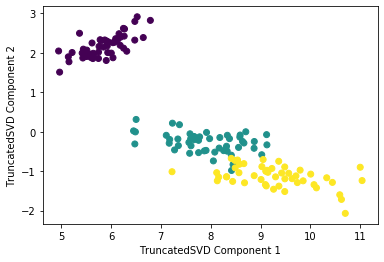

In [4]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
X = iris.data

# 2개의 주요 component로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
iris_tsvd = tsvd.fit_transform(X)

# TruncatedSVD 변환 된 데이터 산점도. 품종은 색깔로 구분
plt.scatter(iris_tsvd[:,0], iris_tsvd[:,1], c=iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

- PCA와 유사하게 변환 후 품종별로 클러스터링이 가능할 정도의 고유성을 가지고 있음

Text(0.5, 1.0, 'PCA Transformed')

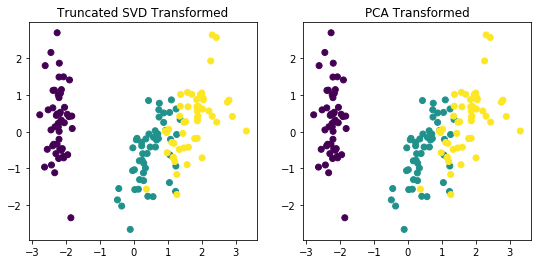

In [5]:
from sklearn.preprocessing import StandardScaler

# iris 데이터를 StandardScaler로 변환
X_scaled = StandardScaler().fit_transform(X)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행 
tsvd = TruncatedSVD(n_components=2)
iris_tsvd = tsvd.fit_transform(X_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행 
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(X_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA변환 데이터를 오른쪽에 표현 
fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(iris_tsvd[:,0], iris_tsvd[:,1], c=iris.target)
ax2.scatter(iris_pca[:,0], iris_pca[:,1], c=iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

- 스케일링된 데이터를 기반으로 변환하면 두 개가 거의 동일함

In [6]:
# 평균값 비교
print((iris_pca - iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean())

2.3075869918602147e-15
-1.474514954580286e-16


- 모두 0에 가까운 값으로 2개의 변환이 서로 동일
- 스케일링으로 데이터 중심이 동일해지면 사이킷런의 SVD와 PCA는 동일한 변환을 수행

- PCA는 밀집 행렬(Dense Matrix)에 대한 변환만 가능하며 SVD는 희소 행렬(Spares Matrix)에 대한 변환도 가능

- SVD는 PCA와 유사하게 컴퓨터 비전 영역에서 이미지 압축을 통한 패턴 인식과 신호 처리 분야에 사용됨

## t-SNE(t-Distributed Stochastic Neighbor Embedding)

- 데이터 포인트 사이의 거리를 가장 잘 보존하는 2차원 표현을 찾는 알고리즘

- t-SNE는 각 데이터를 2차원에 무작위로 표현한 후 임의로 하나의 데이터를 선정

- t-분포 그래프에서 임의로 선정한 데이터를 기준점으로 하여 다른 데이터와의 거리에 있는 t-분포 값을 선택

- 이 t-분포 값을 친밀도라 하고, 이 친밀도가 가까운 값끼리 묶음


- t-SNE 알고리즘은 원본 특성 공간에서 가까운 포인트는 더 가깝게 멀리있는 포인트는 더 멀어지게 만듬
- 멀리 떨어진 포인트와의 거리를 보존하기 보다는 가까이 있는 포인트에 더 많은 비중을 둠 
- 그러나 PCA처럼 군집이 중복되지 않는다는 장점은 있지만 매번 계산 할 때마다 축의 위치가 바뀌어 다른 모양이 나타남
- 탐색적 분석에서는 유용하지만 지도학습용으로는 거의 사용하지 않음



#### 매니폴드 학습 (Manifold Learning)

- 매니폴드는 다양체라고도 하며 국소적으로 유클리드 공간과 닮은 위상 공간
- 많은 차원 축소 알고리즘이 훈련 샘플이 놓여 있는 매니폴드를 모델링하는 식으로 작동 → 매니폴드 학습

<center>
 <img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile2.uf.tistory.com%2Fimage%2F99231F415B8A48B41805B6" alt="스위스롤" width="60%" />

스위스 롤 데이터셋 투영과 펼쳐놓음 비교

</center>

- 매니폴드 학습은 매니폴드 가정(manifold assumption) 또는 매니폴드 가설(manifold hypothesis)에 의해, 고차원인 실제 데이터셋이 더 낮은 저차원 매니폴드에 가깝게 놓여 있다고 가정

- 매니폴드 가정은 종종 다른 가정과 함께 쓰이기도 함
- 분류나 회귀같은 작업을 하기전에 학습 데이터셋을 저차원의 매니폴드 공간으로 표현하면 더 간단하게 문제를 해결할 수 있음
- 그러나 데이터셋이 어떠한 모양을 하고 있느냐에 따라 학습 속도와 모델의 성능이 달라짐

#### t-SNE 실습 01

손글씨 숫자 데이터셋에 t-SNE 적용

In [7]:
# 경고메시지 무시
import warnings
warnings.filterwarnings("ignore")

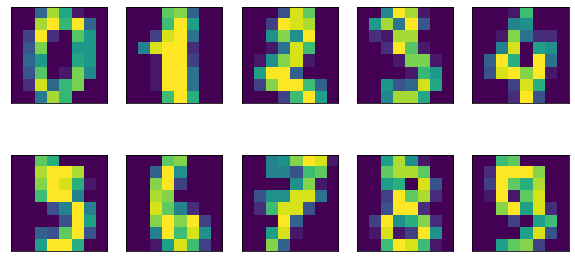

In [8]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                         subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

Text(0, 0.5, '두 번째 주성분')

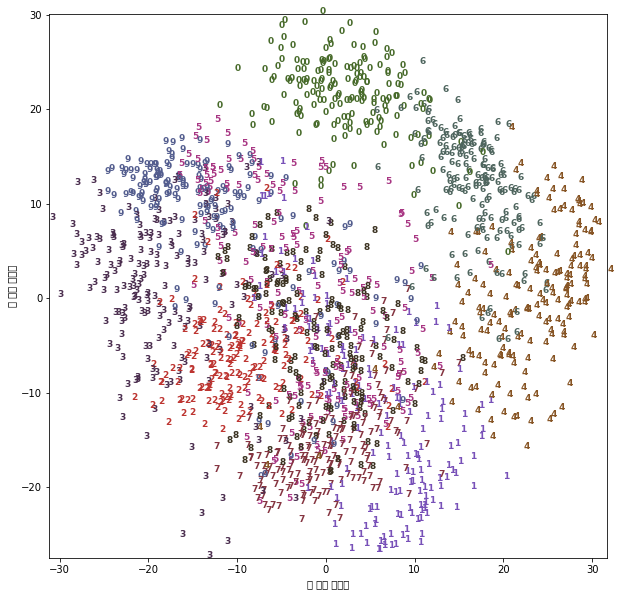

In [9]:
# PCA를 사용해 데이터를 2차원으로 축소하여 시각화
# PCA 모델을 생성
pca = PCA(n_components=2)
digits_pca = pca.fit_transform(digits.data)

# 처음 두 개의 주성분으로 숫자 데이터를 변환
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120","#535D8E"]

plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())


# 숫자 텍스트를 이용한 산점도
for i in range(len(digits.data)):
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

- 0, 6, 4는 두 개의 주성분만으로 비교적 잘 분리
- 다른 숫자들은 대부분 많은 부분이 겹침

In [10]:
# t-SNE를 적용해 결과를 비교
from sklearn.manifold import TSNE
tsne = TSNE(random_state=0)

# TSNE에는 transform 메소드가 없으므로 대신 fit_transform을 사용
digits_tsne = tsne.fit_transform(digits.data)

Text(0, 0.5, 't-SNE 특성 1')

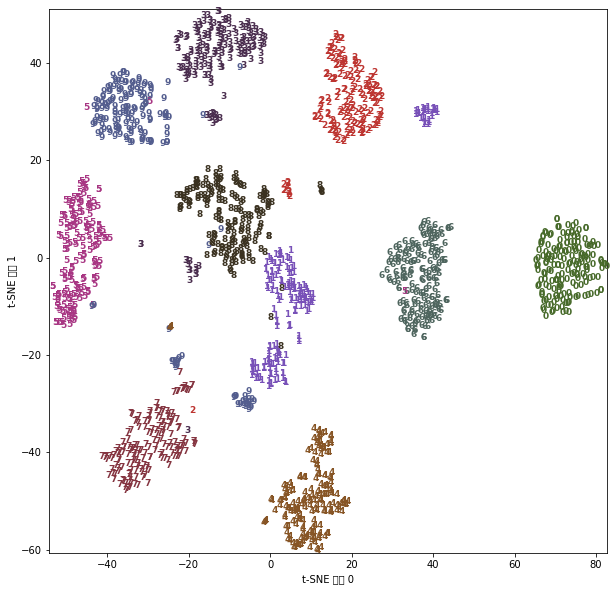

In [11]:
# 처음 두 개의 주성분으로 숫자 데이터를 변환
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)

# 숫자 텍스트를 이용한 산점도
for i in range(len(digits.data)):
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE 특성 0")
plt.ylabel("t-SNE 특성 1")

- 모든 클래스가 확실히 구분